<center><h1>Geng_Haoxiang_HW8</h1></center>

Name: Haoxiang Geng
<br>
Github Username: Haoxiang310
<br>
USC ID: 8045015278

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.special import softmax
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score, 
    recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import StandardScaler, Normalizer
warnings.filterwarnings("ignore")
os.environ['PYTHONWARNINGS'] = 'ignore'

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [2]:
wdbc_data = "../data/wdbc.data.csv"
wdbc_names = "../data/wdbc.names.txt"

data = pd.read_csv(wdbc_data, header=None)

result = []
for i in range(len(data.columns)):
    if i == 0:
        result.append('id')
    elif i == 1:
        result.append('label')
    else:
        result.append(f'col{i}')

data.columns = result
data.replace({'M': 1, 'B': 0}, inplace=True)
data

,id,label,col2,col3,col4,col5,col6,col7,col8,col9,...,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
data['label'].value_counts()

0    357
1    212
Name: label, dtype: int64

In [4]:
def get_train_and_test_data(data, random_state):
    positive_data = data[data['label'] == 1]
    negative_data = data[data['label'] == 0]
    positive_train, positive_test = train_test_split(positive_data, test_size=0.2, random_state = random_state)
    negative_train, negative_test = train_test_split(negative_data, test_size=0.2, random_state = random_state)
    train_data = pd.concat([positive_train, negative_train])
    test_data = pd.concat([positive_test, negative_test])
    train_data.drop(columns=train_data.columns[0], inplace=True)
    test_data.drop(columns=test_data.columns[0], inplace=True)
    y_train = train_data.iloc[:, 0]
    y_test = test_data.iloc[:, 0]
    X_train = train_data.drop(train_data.columns[0], axis=1)
    X_test = test_data.drop(test_data.columns[0], axis=1)
    return X_train, y_train, X_test, y_test

In [5]:
X_train, y_train, X_test, y_test = get_train_and_test_data(data, 50)

In [6]:
X_train

,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,...,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31
236,23.21,26.97,153.50,1670.0,0.09509,0.16820,0.195000,0.123700,0.1909,0.06309,...,31.01,34.51,206.00,2944.0,0.1481,0.41260,0.582000,0.25930,0.3103,0.08677
352,25.73,17.46,174.20,2010.0,0.11490,0.23630,0.336800,0.191300,0.1956,0.06121,...,33.13,23.58,229.30,3234.0,0.1530,0.59370,0.645100,0.27560,0.3690,0.08815
16,14.68,20.13,94.74,684.5,0.09867,0.07200,0.073950,0.052590,0.1586,0.05922,...,19.07,30.88,123.40,1138.0,0.1464,0.18710,0.291400,0.16090,0.3029,0.08216
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.321500,0.16280,0.2572,0.06637
323,20.34,21.51,135.90,1264.0,0.11700,0.18750,0.256500,0.150400,0.2569,0.06670,...,25.30,31.86,171.10,1938.0,0.1592,0.44920,0.534400,0.26850,0.5558,0.10240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,11.15,13.08,70.87,381.9,0.09754,0.05113,0.019820,0.017860,0.1830,0.06105,...,11.99,16.30,76.25,440.8,0.1341,0.08971,0.071160,0.05506,0.2859,0.06772
271,11.29,13.04,72.23,388.0,0.09834,0.07608,0.032650,0.027550,0.1769,0.06270,...,12.32,16.18,78.27,457.5,0.1358,0.15070,0.127500,0.08750,0.2733,0.08022
478,11.49,14.59,73.99,404.9,0.10460,0.08228,0.053080,0.019690,0.1779,0.06574,...,12.40,21.90,82.04,467.6,0.1352,0.20100,0.259600,0.07431,0.2941,0.09180
226,10.44,15.46,66.62,329.6,0.10530,0.07722,0.006643,0.012160,0.1788,0.06450,...,11.52,19.80,73.47,395.4,0.1341,0.11530,0.026390,0.04464,0.2615,0.08269


In [7]:
y_train

236    1
352    1
16     1
565    1
323    1
      ..
153    0
271    0
478    0
226    0
327    0
Name: label, Length: 454, dtype: int64

In [8]:
X_train

,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,...,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31
236,23.21,26.97,153.50,1670.0,0.09509,0.16820,0.195000,0.123700,0.1909,0.06309,...,31.01,34.51,206.00,2944.0,0.1481,0.41260,0.582000,0.25930,0.3103,0.08677
352,25.73,17.46,174.20,2010.0,0.11490,0.23630,0.336800,0.191300,0.1956,0.06121,...,33.13,23.58,229.30,3234.0,0.1530,0.59370,0.645100,0.27560,0.3690,0.08815
16,14.68,20.13,94.74,684.5,0.09867,0.07200,0.073950,0.052590,0.1586,0.05922,...,19.07,30.88,123.40,1138.0,0.1464,0.18710,0.291400,0.16090,0.3029,0.08216
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.321500,0.16280,0.2572,0.06637
323,20.34,21.51,135.90,1264.0,0.11700,0.18750,0.256500,0.150400,0.2569,0.06670,...,25.30,31.86,171.10,1938.0,0.1592,0.44920,0.534400,0.26850,0.5558,0.10240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,11.15,13.08,70.87,381.9,0.09754,0.05113,0.019820,0.017860,0.1830,0.06105,...,11.99,16.30,76.25,440.8,0.1341,0.08971,0.071160,0.05506,0.2859,0.06772
271,11.29,13.04,72.23,388.0,0.09834,0.07608,0.032650,0.027550,0.1769,0.06270,...,12.32,16.18,78.27,457.5,0.1358,0.15070,0.127500,0.08750,0.2733,0.08022
478,11.49,14.59,73.99,404.9,0.10460,0.08228,0.053080,0.019690,0.1779,0.06574,...,12.40,21.90,82.04,467.6,0.1352,0.20100,0.259600,0.07431,0.2941,0.09180
226,10.44,15.46,66.62,329.6,0.10530,0.07722,0.006643,0.012160,0.1788,0.06450,...,11.52,19.80,73.47,395.4,0.1341,0.11530,0.026390,0.04464,0.2615,0.08269


In [9]:
y_train

236    1
352    1
16     1
565    1
323    1
      ..
153    0
271    0
478    0
226    0
327    0
Name: label, Length: 454, dtype: int64

In [10]:
X_test

,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,...,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31
171,13.430,19.63,85.84,565.4,0.09048,0.06288,0.05858,0.034380,0.1598,0.05671,...,17.98,29.87,116.60,993.6,0.14010,0.15460,0.26440,0.11600,0.2884,0.07371
408,17.990,20.66,117.80,991.7,0.10360,0.13040,0.12010,0.088240,0.1992,0.06069,...,21.08,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503
127,19.000,18.91,123.40,1138.0,0.08217,0.08028,0.09271,0.056270,0.1946,0.05044,...,22.32,25.73,148.20,1538.0,0.10210,0.22640,0.32070,0.12180,0.2841,0.06541
64,12.680,23.84,82.69,499.0,0.11220,0.12620,0.11280,0.068730,0.1905,0.06590,...,17.09,33.47,111.80,888.3,0.18510,0.40610,0.40240,0.17160,0.3383,0.10310
38,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.028990,0.1565,0.05504,...,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,13.880,16.16,88.37,596.6,0.07026,0.04831,0.02045,0.008507,0.1607,0.05474,...,15.51,19.97,99.66,745.3,0.08484,0.12330,0.10910,0.04537,0.2542,0.06623
123,14.500,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.057780,0.1856,0.06402,...,15.70,15.98,102.80,745.5,0.13130,0.17880,0.25600,0.12210,0.2889,0.08006
234,9.567,15.91,60.21,279.6,0.08464,0.04087,0.01652,0.016670,0.1551,0.06403,...,10.51,19.16,65.74,335.9,0.15040,0.09515,0.07161,0.07222,0.2757,0.08178
208,13.110,22.54,87.02,529.4,0.10020,0.14830,0.08705,0.051020,0.1850,0.07310,...,14.55,29.16,99.48,639.3,0.13490,0.44020,0.31620,0.11260,0.4128,0.10760


In [11]:
y_test

171    1
408    1
127    1
64     1
38     1
      ..
387    0
123    0
234    0
208    0
507    0
Name: label, Length: 115, dtype: int64

### (b) Monte-Carlo Simulation

#### (i) Supervised Learning

In [12]:
def supervised_learning(X_train, y_train, X_test, y_test):

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    param_grid = {'C': np.logspace(-3, 3, 7)}
    l1_svm = LinearSVC(penalty='l1', dual=False, max_iter=10000)
    grid_search = GridSearchCV(l1_svm, param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    
    y_pred_train = best_model.predict(X_train_scaled)
    y_pred_proba_train = best_model.decision_function(X_train_scaled)
    y_pred_test = best_model.predict(X_test_scaled)
    y_pred_proba_test = best_model.decision_function(X_test_scaled)
    
    #train metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_proba_train)
    train_cm = confusion_matrix(y_train, y_pred_train)
    #test metrics
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_proba_test)
    test_cm = confusion_matrix(y_test, y_pred_test)
    
    # roc curve
    train_fpr, train_tpr, _ = roc_curve(y_train, y_pred_proba_train)
    test_fpr, test_tpr, _ = roc_curve(y_test, y_pred_proba_test)
    
    return train_accuracy, train_precision, train_recall, train_f1, train_auc, train_cm, train_fpr, train_tpr, test_accuracy, test_precision, test_recall, test_f1, test_auc, test_cm, test_fpr, test_tpr

In [13]:
def monte_carlo_supervised(X_train, y_train, X_test, y_test, M):
    train_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}
    test_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}

    for i in range(M):
        train_accuracy, train_precision, train_recall, train_f1, train_auc, train_cm, train_fpr, train_tpr, \
        test_accuracy, test_precision, test_recall, test_f1, test_auc, test_cm, test_fpr, test_tpr = \
            supervised_learning(X_train, y_train, X_test, y_test)

        train_metrics['accuracy'].append(train_accuracy)
        train_metrics['precision'].append(train_precision)
        train_metrics['recall'].append(train_recall)
        train_metrics['f1'].append(train_f1)
        train_metrics['auc'].append(train_auc)
        
        test_metrics['accuracy'].append(test_accuracy)
        test_metrics['precision'].append(test_precision)
        test_metrics['recall'].append(test_recall)
        test_metrics['f1'].append(test_f1)
        test_metrics['auc'].append(test_auc)

        #print roc and cm in the first run
        if i == 0:
            print(f"Train Confusion Matrix in (Iteration {i+1}):\n{train_cm}")
            plt.figure()
            plt.plot(train_fpr, train_tpr, label=f'ROC Curve (area = {train_auc:.2f})')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Train ROC Curve')
            plt.legend(loc="lower right")
            plt.show()
        
            print(f"Test Confusion Matrix in (Iteration {i+1}):\n{test_cm}")           
            plt.figure()
            plt.plot(test_fpr, test_tpr, label=f'ROC Curve (area = {test_auc:.2f})')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Test ROC Curve')
            plt.legend(loc="lower right")
            plt.show()

    average_train_metrics = {metric: np.mean(values) for metric, values in train_metrics.items()}
    average_test_metrics = {metric: np.mean(values) for metric, values in test_metrics.items()}

    print("Average train metrics:".format(M))
    print(average_train_metrics)
    print("Average test metrics:".format(M))
    print(average_test_metrics)

Train Confusion Matrix in (Iteration 1):
[[282   3]
 [  6 163]]


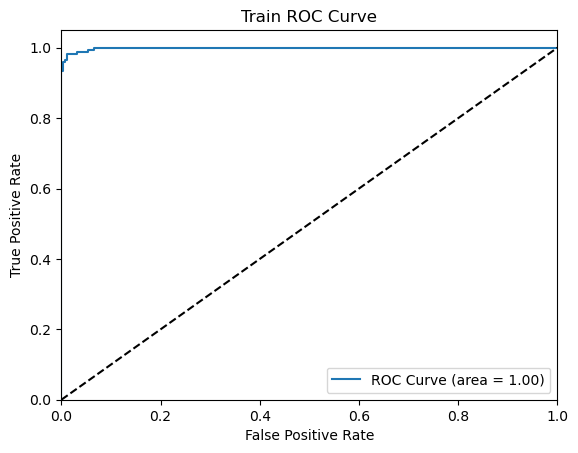

Test Confusion Matrix in (Iteration 1):
[[71  1]
 [ 3 40]]


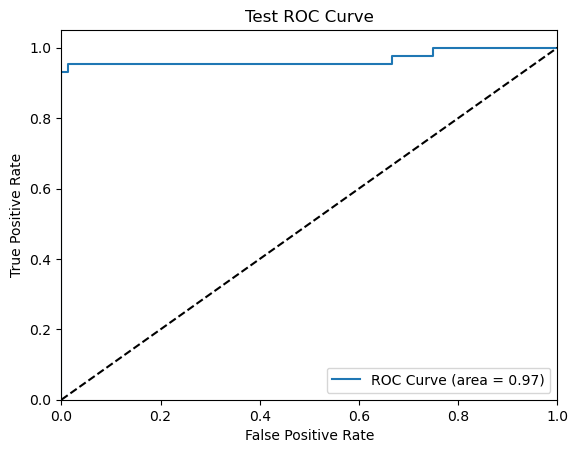

Average train metrics:
{'accuracy': 0.9801762114537447, 'precision': 0.9819277108433734, 'recall': 0.964497041420118, 'f1': 0.9731343283582092, 'auc': 0.9988061870652966}
Average test metrics:
{'accuracy': 0.9652173913043475, 'precision': 0.9756097560975612, 'recall': 0.9302325581395352, 'f1': 0.9523809523809524, 'auc': 0.9667312661498709}


In [14]:
monte_carlo_supervised(X_train, y_train, X_test, y_test, 30)

#### (ii) Semi-Supervised Learning/ Self-training

##### (A)

In [15]:
def find_best_C(X_train, y_train):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    svm = LinearSVC(penalty='l1', dual=False, max_iter=10000)
    param_grid = {'C': np.logspace(-3, 6, 10)}
    grid_search = GridSearchCV(svm, param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)

    return grid_search.best_params_['C']

In [16]:
best_C = find_best_C(X_train, y_train)
print("best C is:", best_C)

best C is: 0.1


##### (B)

In [17]:
def semi_supervised_self_training(X_train, y_train, X_test, y_test, best_C, M):
    train_metrics_avg = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0, 'auc': 0}
    test_metrics_avg = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0, 'auc': 0}

    for m in range(M):
        pos_indices = np.where(y_train == 1)[0]
        neg_indices = np.where(y_train == 0)[0]
        np.random.shuffle(pos_indices)
        np.random.shuffle(neg_indices)
        
        labeled_pos = pos_indices[:len(pos_indices) // 2]
        labeled_neg = neg_indices[:len(neg_indices) // 2]
        unlabeled_indices = np.concatenate((pos_indices[len(pos_indices) // 2:], neg_indices[len(neg_indices) // 2:]))
        
        X_labeled = X_train.iloc[np.concatenate((labeled_pos, labeled_neg)), :]
        y_labeled = y_train.iloc[np.concatenate((labeled_pos, labeled_neg))]
        X_unlabeled = X_train.iloc[unlabeled_indices, :]
        
        scaler = StandardScaler()
        X_labeled_scaled = scaler.fit_transform(X_labeled)
        X_unlabeled_scaled = scaler.transform(X_unlabeled)
        X_test_scaled = scaler.transform(X_test)
        
        svm = LinearSVC(penalty='l1', dual=False, max_iter=10000, C=best_C)
        svm.fit(X_labeled_scaled, y_labeled)

        while len(X_unlabeled_scaled) > 0:
            distances = svm.decision_function(X_unlabeled_scaled)
            farthest_index = np.argmax(np.abs(distances))
            
            X_labeled_scaled = np.vstack((X_labeled_scaled, X_unlabeled_scaled[farthest_index].reshape(1, -1)))
            y_labeled = np.append(y_labeled, svm.predict(X_unlabeled_scaled[farthest_index].reshape(1, -1)))
            
            X_unlabeled_scaled = np.delete(X_unlabeled_scaled, farthest_index, axis=0)
            svm.fit(X_labeled_scaled, y_labeled)

        y_train_pred = svm.predict(scaler.transform(X_train))
        y_test_pred = svm.predict(X_test_scaled)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred, zero_division=0)
        train_recall = recall_score(y_train, y_train_pred, zero_division=0)
        train_f1 = f1_score(y_train, y_train_pred, zero_division=0)
        train_auc = roc_auc_score(y_train, svm.decision_function(scaler.transform(X_train)))

        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, zero_division=0)
        test_recall = recall_score(y_test, y_test_pred, zero_division=0)
        test_f1 = f1_score(y_test, y_test_pred, zero_division=0)
        test_auc = roc_auc_score(y_test, svm.decision_function(X_test_scaled))

        train_metrics_avg['accuracy'] += train_accuracy
        train_metrics_avg['precision'] += train_precision
        train_metrics_avg['recall'] += train_recall
        train_metrics_avg['f1'] += train_f1
        train_metrics_avg['auc'] += train_auc

        test_metrics_avg['accuracy'] += test_accuracy
        test_metrics_avg['precision'] += test_precision
        test_metrics_avg['recall'] += test_recall
        test_metrics_avg['f1'] += test_f1
        test_metrics_avg['auc'] += test_auc
        
        
        #output the cm and roc curve in the first iteration
        if m == 0:
            train_fpr, train_tpr, _ = roc_curve(y_train, svm.decision_function(scaler.transform(X_train)))
            train_roc_auc = auc(train_fpr, train_tpr)
            plt.figure()
            plt.plot(train_fpr, train_tpr, color='blue', lw=2, label=f'Train ROC curve (area = {train_roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Train ROC Curve')
            plt.legend(loc="lower right")
            plt.show()

            test_fpr, test_tpr, _ = roc_curve(y_test, svm.decision_function(X_test_scaled))
            test_roc_auc = auc(test_fpr, test_tpr)
            plt.figure()
            plt.plot(test_fpr, test_tpr, color='red', lw=2, label=f'Test ROC curve (area = {test_roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Test ROC Curve')
            plt.legend(loc="lower right")
            plt.show()

            train_cm = confusion_matrix(y_train, y_train_pred)
            test_cm = confusion_matrix(y_test, y_test_pred)
            print(f"Train Confusion Matrix:\n{train_cm}")
            print(f"Test Confusion Matrix:\n{test_cm}")

    for metric in train_metrics_avg:
        train_metrics_avg[metric] /= M
        test_metrics_avg[metric] /= M

    print("Average train metrics:", train_metrics_avg)
    print("Average test metrics:", test_metrics_avg)
    return train_metrics_avg, test_metrics_avg

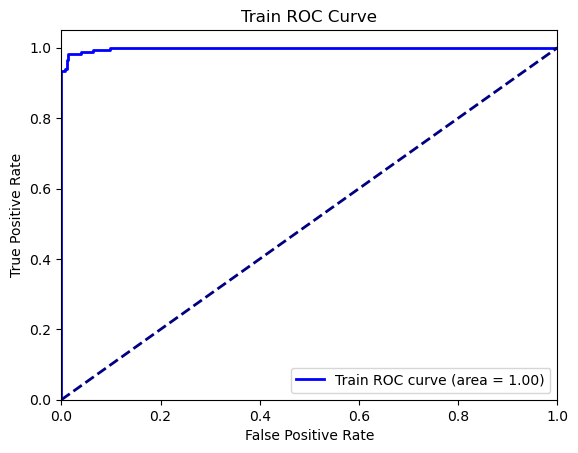

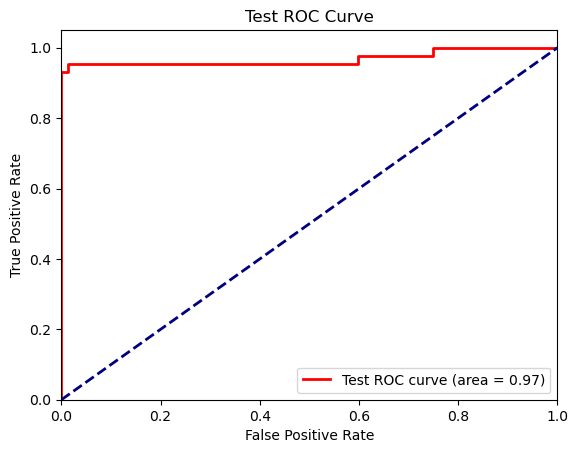

Train Confusion Matrix:
[[282   3]
 [  6 163]]
Test Confusion Matrix:
[[72  0]
 [ 3 40]]
Average train metrics: {'accuracy': 0.9770925110132161, 'precision': 0.9846167951852014, 'recall': 0.9534516765285997, 'f1': 0.9686990206979831, 'auc': 0.9981604899823522}
Average test metrics: {'accuracy': 0.9643478260869565, 'precision': 0.9753868541177108, 'recall': 0.9286821705426362, 'f1': 0.9512599368829583, 'auc': 0.9667204995693371}


In [18]:
train_metrics_avg, test_metrics_avg = semi_supervised_self_training(X_train, y_train, X_test, y_test, best_C, M=30)

#### (iii) Unsupervised Learning

##### (A)

- Randomly setting data points or cluster centers (or randomly selecting cluster medoids):      This means that each time you run K-means, you start from a different starting point. Doing so can increase the chance of finding a better optimum solution since you are not always starting from the same initial configuration.

- Running K-means multiple times and finding the minimal Within-Cluster Variance (WCV):      By repeatedly running K-means and comparing the results, you can choose the clustering with the smallest within-cluster variance as the final result. The within-cluster variance is a measure of the clustering effect, quantifying the average distance of points in the same cluster to their cluster center.

##### (B)

In [19]:
def get_distance(cluster_centers, data_points, labels):
    distance_array = np.ndarray((data_points.shape[0],))
    probability_array = np.ndarray((data_points.shape[0], 2))
    for index, point in enumerate(data_points):
        assigned_center = cluster_centers[labels[index]]
        distance_array[index] = np.linalg.norm(point - assigned_center)
        probability_array[index, 0] = np.linalg.norm(point - cluster_centers[0])
        probability_array[index, 1] = np.linalg.norm(point - cluster_centers[1])
    probability_array = softmax(probability_array, axis=1).astype(np.float64)
    return distance_array, probability_array

def get_majority(data_points, labels, distances, true_labels):
    cluster_label_map = np.ndarray((2,), dtype=int)
    majority_labels = labels.copy()
    for cluster in [0, 1]:
        indices_in_cluster = np.where(labels == cluster)[0]
        top_indices = sorted(indices_in_cluster.tolist(), key=lambda idx: distances[idx])[:30]
        majority_label = true_labels.iloc[top_indices].value_counts().index[0]
        majority_labels[indices_in_cluster] = majority_label
        cluster_label_map[majority_label] = cluster
    return cluster_label_map, majority_labels

def monte_carlo_kmeans_spectral(X_train, y_train, X_test, y_test, n, algo):
    cols = ['acc', 'precision', 'recall', 'f1-score', 'auc']
    train_results = pd.DataFrame(columns=cols)
    test_results = pd.DataFrame(columns=cols)

    for i in range(n):
        scaler = Normalizer()
        norm_trainX = scaler.fit_transform(X_train)
        norm_testX = scaler.transform(X_test)

        if algo == 'Unsupervised-KMeans':
            cluster_model = KMeans(n_clusters=2, n_init=15, random_state=i).fit(norm_trainX)
        elif algo == 'Unsupervised-Spectral':
            cluster_labels = SpectralClustering(n_clusters=2, assign_labels='kmeans', affinity='rbf', eigen_tol=1e-2, eigen_solver='arpack', random_state=0).fit_predict(norm_trainX)
            cluster_model = KNeighborsClassifier(n_neighbors=1).fit(norm_trainX, cluster_labels)

        #Process for both training and testing
        for data, labels, set_name in [(norm_trainX, y_train, 'Training'), (norm_testX, y_test, 'Testing')]:
            if algo == 'Unsupervised-KMeans':
                cluster_label = cluster_model.predict(data)
                centers = cluster_model.cluster_centers_
            elif algo == 'Unsupervised-Spectral':
                cluster_label = cluster_model.predict(data)
                centers = [np.mean(data[cluster_label == clus], axis=0) for clus in [0, 1]]

            dist, proba = get_distance(centers, data, cluster_label)
            label2cluster, predicted_label = get_majority(data, cluster_label, dist, labels)

            pos_cluster = label2cluster[0]
            predicted_proba = proba[:, pos_cluster]
            report = classification_report(labels, predicted_label, output_dict=True)

            acc = report['accuracy']
            fpr, tpr, thresholds = roc_curve(labels, predicted_proba, pos_label=1)
            roc_auc = round(auc(fpr, tpr), 4)
            metrics = {
                'acc': acc,
                'precision': report['weighted avg']['precision'],
                'recall': report['weighted avg']['recall'],
                'f1-score': report['weighted avg']['f1-score'],
                'auc': roc_auc
            }

            if set_name == 'Training':
                train_results = train_results.append(metrics, ignore_index=True)
            else:
                test_results = test_results.append(metrics, ignore_index=True)

            if i == 0:
                plt.figure()
                plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
                plt.plot([0, 1], [0, 1], linestyle='--')
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'ROC Curve for {set_name}')
                plt.legend(loc="lower right")
                plt.show()

                cm = confusion_matrix(labels, predicted_label)
                print(f'{set_name} Confusion Matrix:\n', cm)

    avg_train_metrics = train_results.mean()
    avg_test_metrics = test_results.mean()

    print(f'Average Training Metrics:\n{avg_train_metrics}')
    print(f'Average Testing Metrics:\n{avg_test_metrics}')

#     return avg_train_metrics, avg_test_metrics, train_results, test_results

##### (C)

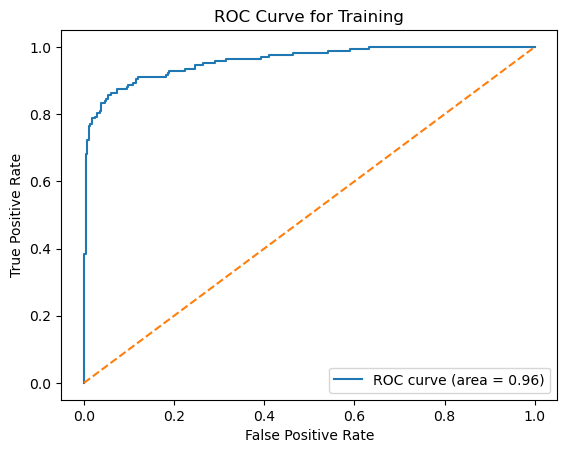

Training Confusion Matrix:
 [[282   3]
 [ 45 124]]


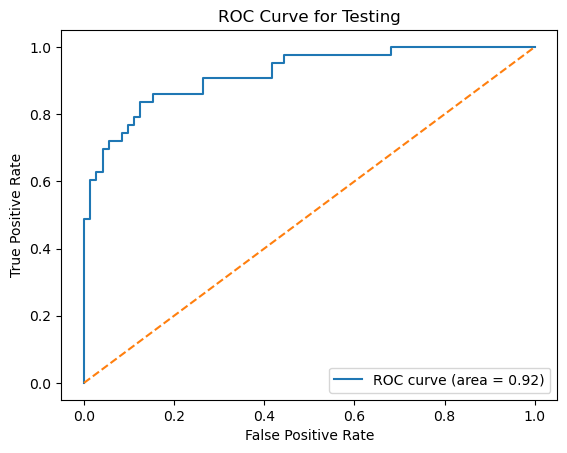

Testing Confusion Matrix:
 [[69  3]
 [13 30]]
Average Training Metrics:
acc          0.894273
precision    0.904819
recall       0.894273
f1-score     0.890400
auc          0.959400
dtype: float64
Average Testing Metrics:
acc          0.860870
precision    0.866750
recall       0.860870
f1-score     0.856233
auc          0.919600
dtype: float64


In [20]:
monte_carlo_kmeans_spectral(X_train, y_train, X_test, y_test, 30, 'Unsupervised-KMeans')

#### (iv) Spectral Clustering

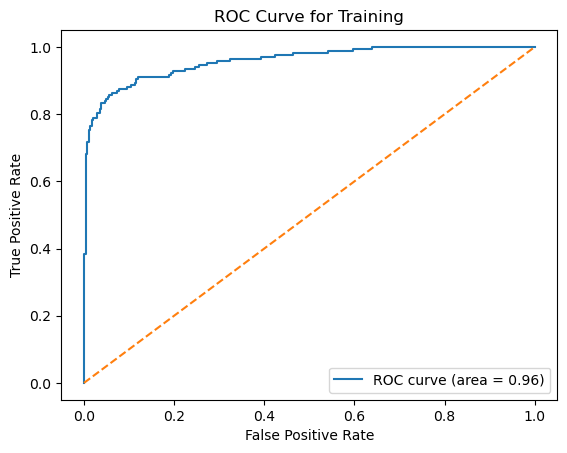

Training Confusion Matrix:
 [[282   3]
 [ 48 121]]


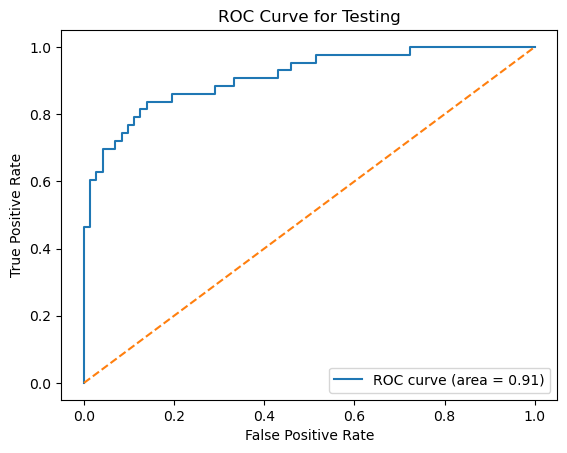

Testing Confusion Matrix:
 [[69  3]
 [14 29]]
Average Training Metrics:
acc          0.887665
precision    0.899684
recall       0.887665
f1-score     0.883149
auc          0.958700
dtype: float64
Average Testing Metrics:
acc          0.852174
precision    0.859341
recall       0.852174
f1-score     0.846579
auc          0.911500
dtype: float64


In [21]:
monte_carlo_kmeans_spectral(X_train, y_train, X_test, y_test, 30, 'Unsupervised-Spectral')

#### (iv) Compare

### Supervised learning with svm
Average train metrics:      
{'accuracy': 0.9801762114537447, 'precision': 0.9819277108433734, 'recall': 0.964497041420118, 'f1': 0.9731343283582092, 'auc': 0.9988089553271742}       

Average test metrics:      
{'accuracy': 0.9652173913043475, 'precision': 0.9756097560975612, 'recall': 0.9302325581395352, 'f1': 0.9523809523809524, 'auc': 0.9667312661498709}         

### Semi-supervised learning with svm
Average train metrics:       
{'accuracy': 0.9767988252569754, 'precision': 0.9837959304216465, 'recall': 0.9534516765285999, 'f1': 0.9683260358829692, 'auc': 0.9982691442610473}     

Average test metrics:        
{'accuracy': 0.9649275362318842, 'precision': 0.976855285320969, 'recall': 0.9286821705426362, 'f1': 0.95198929762033, 'auc': 0.9662037037037039}      
  
### K-means clustering
Average Training Metrics:

acc          0.894273
precision    0.904819
recall       0.894273
f1-score     0.890400
auc          0.959400

Average Testing Metrics:
acc          0.860870
precision    0.866750
recall       0.860870
f1-score     0.856233
auc          0.919600

### Spectral Clustering:
Average Training Metrics:

acc          0.887665
precision    0.899684
recall       0.887665
f1-score     0.883149
auc          0.958700

Average Testing Metrics:
acc          0.852174
precision    0.859341
recall       0.852174
f1-score     0.846579
auc          0.911500

### Supervised learning provides slightly better performance than semi-supervised leearning in terms of training and test accuracy. However, unsupervised learning methods like K-Means and Spectral Clustering perform less effectively in such scenarios. They are significantly lower than supervised and semi-supervised learning in terms of accuracy.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [22]:
data = "../data/data_banknote_authentication.txt"
data = pd.read_csv(data, header=None)
data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [23]:
data['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

In [24]:
def run_monte_carlo_learning(dataset, num_iterations, learning_type):
    param_grid = {'C': np.logspace(-2, 7, 20)}
    grid_search_params = {
        'param_grid': param_grid,
        'scoring': 'f1_weighted',
        'n_jobs': -1,
        'verbose': 0
    }

    learning_results = []
    
    for iteration in range(num_iterations):
        #Splitting dataset
        num_test_samples = 472
        test_indices = np.random.choice(dataset.shape[0], num_test_samples, replace=False)
        train_indices = np.array([idx for idx in range(dataset.shape[0]) if idx not in test_indices])
        training_data, testing_data = dataset.iloc[train_indices], dataset.iloc[test_indices]
        X_train, y_train = training_data.iloc[:, :-1], training_data.iloc[:, -1]
        X_test, y_test = testing_data.iloc[:, :-1], testing_data.iloc[:, -1]
        normalizer = Normalizer()
        X_train_normalized = normalizer.fit_transform(X_train)
        X_test_normalized = normalizer.transform(X_test)
        grid_search_params['cv'] = StratifiedKFold(5, random_state=iteration, shuffle=True)
        
        if learning_type == 'passive':
            accuracies = passive_learning(X_train_normalized, y_train, X_test_normalized, y_test, grid_search_params)
        elif learning_type == 'active':
            accuracies = active_learning(X_train_normalized, y_train, X_test_normalized, y_test, grid_search_params)
        
        learning_results.append(accuracies)
        print(f"Iteration {iteration + 1} | Test Accuracy (First 10 samples): {round(accuracies[0], 4)} | Test Accuracy (Second 10 samples): {round(accuracies[1], 4)} | ...| Test Accuracy (Total 900 samples): {round(accuracies[-1], 4)}")
    
    average_results = np.mean(np.array(learning_results), axis=0)
    return average_results

In [25]:
def passive_learning(X_train, y_train, X_test, y_test, grid_params):
    num_samples = X_train.shape[0]
    accuracies = []

    for train_size in range(10, num_samples + 1, 10):
        train_indices = np.random.choice(range(num_samples), size=train_size, replace=False)
        X_train_subset, y_train_subset = X_train[train_indices], y_train.iloc[train_indices]

        model = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **grid_params)
        model.fit(X_train_subset, y_train_subset)

        y_pred = model.predict(X_test)
        accuracy = classification_report(y_test, y_pred, output_dict=True)['accuracy']
        accuracies.append(accuracy)

    return accuracies

In [27]:
passive_learning_curve = run_monte_carlo_learning(data, 50, 'passive')

Iteration 1 | Test Accuracy (First 10 samples): 0.9746 | Test Accuracy (Second 10 samples): 0.8665 | ...| Test Accuracy (Total 900 samples): 0.9894
Iteration 2 | Test Accuracy (First 10 samples): 0.9025 | Test Accuracy (Second 10 samples): 0.9746 | ...| Test Accuracy (Total 900 samples): 0.9936
Iteration 3 | Test Accuracy (First 10 samples): 0.8814 | Test Accuracy (Second 10 samples): 0.9873 | ...| Test Accuracy (Total 900 samples): 0.9915
Iteration 4 | Test Accuracy (First 10 samples): 0.9068 | Test Accuracy (Second 10 samples): 0.8686 | ...| Test Accuracy (Total 900 samples): 0.9894
Iteration 5 | Test Accuracy (First 10 samples): 0.8432 | Test Accuracy (Second 10 samples): 0.8665 | ...| Test Accuracy (Total 900 samples): 0.9958
Iteration 6 | Test Accuracy (First 10 samples): 0.9894 | Test Accuracy (Second 10 samples): 0.9703 | ...| Test Accuracy (Total 900 samples): 0.9936
Iteration 7 | Test Accuracy (First 10 samples): 0.8008 | Test Accuracy (Second 10 samples): 0.9725 | ...| Test A

#### (ii) Active

In [28]:
def active_learning(X_train, y_train, X_test, y_test, grid_params):
    indices_to_use = np.arange(X_train.shape[0])
    used_indices = []
    accuracies = []
    np.random.shuffle(indices_to_use)
    initial_indices, indices_to_use = indices_to_use[:10], indices_to_use[10:]
    used_indices.extend(initial_indices)
    while len(used_indices) <= 900:
        X_train_subset, y_train_subset = X_train[used_indices], y_train.iloc[used_indices]
        model = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **grid_params)
        model.fit(X_train_subset, y_train_subset)

        y_pred = model.predict(X_test)
        accuracy = classification_report(y_test, y_pred, output_dict=True)['accuracy']
        accuracies.append(accuracy)

        if len(indices_to_use) == 0:
            break
        decision_function = model.decision_function(X_train[indices_to_use])
        indices_to_select = np.argsort(np.abs(decision_function))[:10]
        selected_indices = indices_to_use[indices_to_select]
        used_indices.extend(selected_indices)
        indices_to_use = np.delete(indices_to_use, indices_to_select)

    return accuracies

In [29]:
active_learning_curve = run_monte_carlo_learning(data, 50, 'active')

Iteration 1 | Test Accuracy (First 10 samples): 0.8856 | Test Accuracy (Second 10 samples): 0.9301 | ...| Test Accuracy (Total 900 samples): 0.9936
Iteration 2 | Test Accuracy (First 10 samples): 0.8729 | Test Accuracy (Second 10 samples): 0.9661 | ...| Test Accuracy (Total 900 samples): 0.9936
Iteration 3 | Test Accuracy (First 10 samples): 0.9936 | Test Accuracy (Second 10 samples): 0.9004 | ...| Test Accuracy (Total 900 samples): 0.9936
Iteration 4 | Test Accuracy (First 10 samples): 0.839 | Test Accuracy (Second 10 samples): 0.947 | ...| Test Accuracy (Total 900 samples): 0.9936
Iteration 5 | Test Accuracy (First 10 samples): 0.8517 | Test Accuracy (Second 10 samples): 0.947 | ...| Test Accuracy (Total 900 samples): 0.9852
Iteration 6 | Test Accuracy (First 10 samples): 0.9068 | Test Accuracy (Second 10 samples): 0.9873 | ...| Test Accuracy (Total 900 samples): 0.9915
Iteration 7 | Test Accuracy (First 10 samples): 0.8242 | Test Accuracy (Second 10 samples): 0.9407 | ...| Test Accu

### (c) Average the 50 test errors

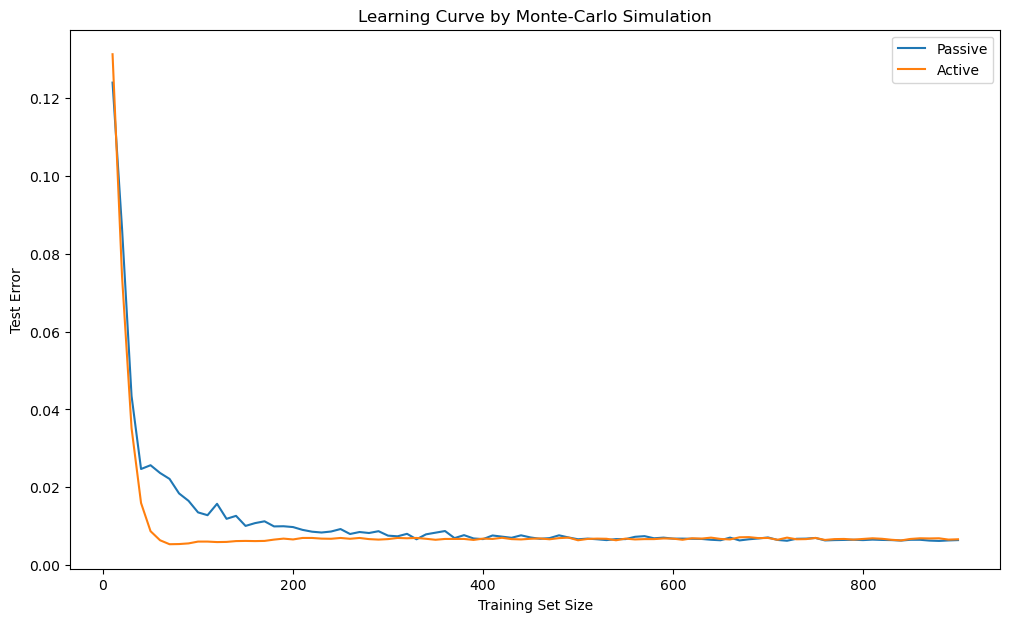

In [30]:
fig, axes = plt.subplots(figsize=(12, 7))
axes.set_title(f"Learning Curve by Monte-Carlo Simulation")
x = 10 * np.arange(1, 91)
axes.plot(x, 1 - passive_learning_curve, label='Passive')
axes.plot(x, 1 - active_learning_curve, label='Active')
axes.set_xlabel("Training Set Size")
axes.set_ylabel("Test Error")
axes.legend()
plt.show()